# Dados e tratamento:

In [1]:
# !pip install --upgrade plotly.express

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('/content/infant_mortality_rate.csv', header = 1)

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,United Arab Emirates,ARE,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,135.5,128.9,122.5,116.2,109.9,103.3,...,7.0,6.8,6.7,6.5,6.3,6.2,6.0,5.8,5.6,5.4
1,Antigua and Barbuda,ATG,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,62.9,58.8,54.3,49.6,44.9,40.4,...,7.5,7.1,6.8,6.5,6.2,6.0,5.7,5.5,5.3,5.2
2,Australia,AUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,20.3,19.9,19.5,19.1,18.7,18.5,...,3.6,3.5,3.3,3.3,3.2,3.2,3.2,3.2,3.2,3.2
3,Austria,AUT,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,37.3,34.9,32.9,31.1,29.6,28.3,...,3.3,3.2,3.1,3.0,3.0,2.9,2.9,2.9,3.0,3.0
4,Belgium,BEL,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,29.4,28.1,27.0,26.0,25.0,24.0,...,3.5,3.4,3.4,3.4,3.3,3.4,3.4,3.4,3.4,3.4


In [5]:
df = df.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
df.sort_values(by = 'Country Name', inplace = True)
df.reset_index(drop = True, inplace = True)
df = df.T

col_country = df.iloc[0]
df = df.rename(columns = col_country)
df = df[1:]

nulls = np.array(df.isnull().sum().tolist())
print(nulls.max())

0


In [6]:
df.dtypes

for col in df.columns[0:]:
    df[col] = df[col].astype(float)

# Regressão linear múltipla:

## Pressupostos:

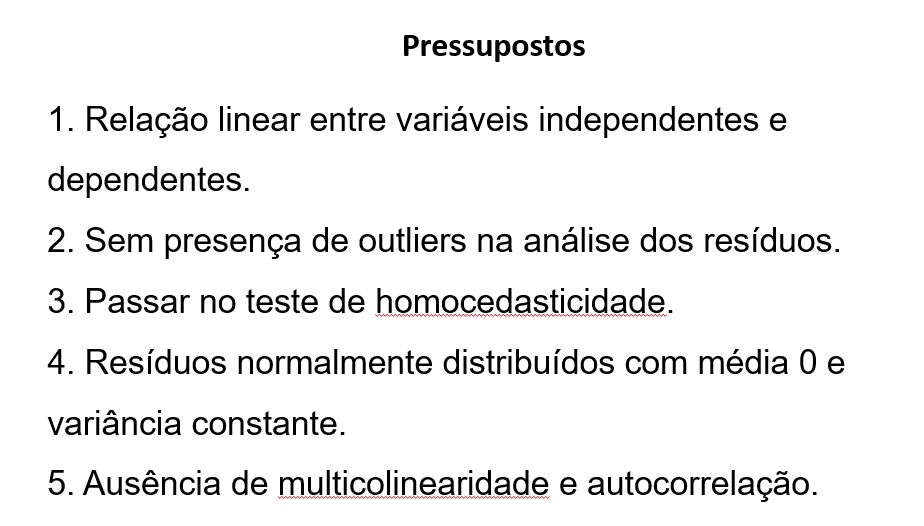


## Cálculos:

```
# Sklearn
```



### Sklearn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [8]:
dfcalc = df.T
dfcalc

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Algeria,145.6,145.7,145.9,146.3,146.8,147.3,147.6,147.7,147.4,146.5,...,22.8,22.4,22.0,21.7,21.4,21.0,20.6,20.1,19.6,19.2
Antigua and Barbuda,62.9,58.8,54.3,49.6,44.9,40.4,36.1,32.3,29.0,26.2,...,7.5,7.1,6.8,6.5,6.2,6.0,5.7,5.5,5.3,5.2
Australia,20.3,19.9,19.5,19.1,18.7,18.5,18.3,18.2,18.1,18.0,...,3.6,3.5,3.3,3.3,3.2,3.2,3.2,3.2,3.2,3.2
Austria,37.3,34.9,32.9,31.1,29.6,28.3,27.2,26.3,25.7,25.2,...,3.3,3.2,3.1,3.0,3.0,2.9,2.9,2.9,3.0,3.0
Bahrain,133.0,122.6,113.2,104.4,96.0,88.1,80.9,74.1,67.8,62.1,...,6.7,6.6,6.5,6.4,6.3,6.2,6.1,6.1,6.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,56.6,55.4,54.1,52.8,51.9,51.4,51.0,50.6,50.0,49.0,...,8.7,8.4,8.0,7.7,7.3,6.8,6.3,5.8,5.4,5.0
Vanuatu,104.5,101.9,99.0,96.1,93.1,90.2,87.1,84.1,81.1,78.2,...,23.9,23.7,23.3,22.9,22.4,21.9,21.4,20.9,20.3,19.7
"Venezuela, RB",58.9,57.3,55.9,54.7,53.7,52.8,51.9,51.0,50.2,49.2,...,14.9,15.1,15.4,16.5,21.1,21.1,21.1,21.1,21.1,21.1
Zambia,121.5,119.4,117.6,116.1,114.7,113.7,113.0,112.6,111.9,110.7,...,49.3,48.1,47.2,47.2,45.6,44.2,43.6,42.4,41.1,40.2


In [9]:
X = dfcalc.iloc[ : , : len(df) -  1].values
X

array([[145.6, 145.7, 145.9, ...,  20.6,  20.1,  19.6],
       [ 62.9,  58.8,  54.3, ...,   5.7,   5.5,   5.3],
       [ 20.3,  19.9,  19.5, ...,   3.2,   3.2,   3.2],
       ...,
       [ 58.9,  57.3,  55.9, ...,  21.1,  21.1,  21.1],
       [121.5, 119.4, 117.6, ...,  43.6,  42.4,  41.1],
       [ 92.8,  90.6,  88.4, ...,  38. ,  37.1,  36.6]])

In [10]:
y = df.loc['2021'].values
y

array([19.2,  5.2,  3.2,  3. ,  5.9, 22.9, 11.1,  3.4, 55.2, 20.2, 28.3,
       12.9,  9.9,  9.6,  5.3, 51.8, 11.7, 47. ,  4.4,  5.6, 11.1, 32. ,
        6.2, 55.9,  4. ,  3.1, 32. , 27.3, 10.7, 16.2, 10.7, 41.5, 23.3,
        1.8,  3.4, 34. , 32.6,  3.3, 14.4, 19.6, 63.8, 23.2, 45.4, 14.2,
        3.3,  2.1, 25.5, 18.9, 20.7,  2.7,  2.7,  2.2, 10.7,  1.7, 12.6,
       28. , 38.3,  2.5,  7.5,  7.1, 57. , 56.7,  9.2,  2.2,  6.5,  5.1,
       24.8, 32.2, 15.3, 11.4, 21. , 15.4, 22.8,  3.5,  3.9, 11.4,  1.8,
       52.8, 11.9, 34.4, 15.6, 11. , 20.5,  3.7,  2.5,  5.3, 29.7, 14.4,
       29.1, 12. , 78.3,  1.7, 16.1,  2.6,  5.8, 22.4, 12.6, 38.9,  2. ,
        3.4, 18.4, 34.1,  7.1, 43.4, 14.6,  7.7,  3.8, 18.1, 31.2,  5.4,
        3.7,  5.4,  5. , 19.7, 21.1, 40.2, 35.7])

In [11]:
model_rlm = LinearRegression()

tX, vX, ty, vy =  train_test_split(X, y, random_state = 1, test_size= 0.33)

model_rlm.fit(tX, ty)

LinearRegression()

In [12]:
pred = model_rlm.predict(vX) # O comando pegará os valores de vX e irá tentar prever o vy com base dos testes em tX e ty
pred

array([11.562628  , 25.60608117,  7.02425825, 22.05114726,  3.73128528,
        2.20377316, 52.42268946,  1.80413694,  5.215877  , 12.46744379,
       22.06619504, 45.15198263,  3.02338231,  9.75855021,  3.50775209,
       28.17518801, 43.48496466, 17.28160784, 25.0192731 ,  3.11020864,
       52.99417643, 47.32502726, 13.71223809,  4.02965141, 38.22236696,
       13.80267187, 34.24760439, 14.41071895,  2.5532906 , 20.88459781,
        1.76166902,  6.89676506, 16.1979698 , 37.56092927, 31.20708328,
        5.6006468 , 22.84193521, 12.0898077 ,  6.15699652])

In [13]:
vy

array([11.4, 25.5,  7.5, 21.1,  3.5,  2. , 41.5,  1.7,  5.1, 12.6, 22.4,
       38.9,  3.2,  9.2,  3.7, 28. , 43.4, 18.4, 24.8,  3.3, 52.8, 47. ,
       11. ,  3.9, 38.3,  5.8, 34. , 14.4,  2.6, 20.7,  1.8,  7.1, 16.1,
       45.4, 28.3,  5.3, 23.3, 11.9,  5.6])

In [14]:
model_rlm.intercept_

0.03438583347140778

In [15]:
model_rlm.coef_

array([ 2.86848235e-03, -4.96555261e-03, -6.60163987e-02,  2.23600488e-01,
       -2.13485187e-01, -1.40324728e-01,  2.58514250e-01,  1.92561935e-01,
       -2.97304316e-01, -1.36617809e-01,  2.81975759e-01, -8.53647578e-02,
        3.70185070e-02, -2.23909570e-01,  2.14781735e-01,  6.71762600e-02,
       -2.41262723e-01,  4.30106712e-01, -5.06664293e-01,  1.98079793e-01,
       -1.07449371e-03, -2.28672450e-01,  1.91391345e-01,  7.21213929e-01,
       -1.29771284e+00,  8.38606897e-01, -4.38415147e-01,  7.41031348e-01,
       -9.26153984e-01,  5.36167635e-01, -2.23245562e-01,  2.46469456e-01,
       -3.87542504e-01,  2.85146583e-01,  2.37885106e-02,  1.88646680e-01,
       -6.36913915e-01,  5.02711309e-01, -2.16554140e-01,  3.85500704e-01,
       -2.39519594e-01, -2.83538924e-01,  6.56023362e-02, -1.98013143e-01,
        9.19865068e-01, -5.84190907e-02, -7.25706420e-01, -9.80575542e-02,
        2.40994484e-02,  6.51346015e-01, -4.55817467e-01,  2.32818742e-01,
       -6.84875758e-02, -

In [16]:
model_rlm.score(vX,vy)

0.9649180155553414

## Passo 1:


```
# Relação linear entre variáveis dependentes e independentes.
```



In [ ]:
fig = px.line(df);

fig.update_xaxes(title = 'year')
fig.update_yaxes(title = 'mortality rate (per 1000)')

In [ ]:
fig = px.density_heatmap(df.corr(), color_continuous_scale = 'Viridis', text_auto = True, height = 800);
fig.show();
# plt.figure(figsize = (100,100))
# sns.heatmap(df.corr(), cmap = 'magma', annot = True)

## Passo 2:


```
# Detectar outliers
```



In [19]:
def detect_outliers(df):
    # SuperiorLimit = Q3 + 1,5 * IQR
    # InferiorLimit = Q1 - 1,5 * IQR

    outlier = {}
    desc = df.describe()

    q1 = desc.loc['25%'] # if the code were desc.iloc[4:5, :], there would be a df instead of a Series
    q3 = desc.loc['75%']
    iqr = q3 - q1

    for col in df.columns[0:]:
        n = 0
        for i in range(0, len(df)):
            if (df[col][i] > q3[col] + 1.5 * iqr[col]) or (df[col][i] < q1[col] - 1.5 * iqr[col]):
                n+= 1
        if n >= 1:
            outlier[col] = n

    return outlier

In [20]:
detect_outliers(df)

{'Antigua and Barbuda': 10,
 'Bahrain': 7,
 'Barbados': 4,
 'British Virgin Islands': 3,
 'Brunei Darussalam': 7,
 'Bulgaria': 1,
 'Canada': 1,
 'Chile': 2,
 'Congo, Rep.': 3,
 "Cote d'Ivoire": 1,
 'Denmark': 4,
 'Dominica': 5,
 'Finland': 2,
 'Grenada': 1,
 'Iraq': 3,
 'Japan': 5,
 'Jordan': 1,
 'Kuwait': 3,
 'Libya': 2,
 'Luxembourg': 1,
 'Marshall Islands': 2,
 'Micronesia, Fed. Sts.': 1,
 'Poland': 2,
 'Portugal': 1,
 'Romania': 2,
 'Singapore': 2,
 'Solomon Islands': 4,
 'Spain': 4,
 'St. Lucia': 9,
 'St. Vincent and the Grenadines': 2,
 'Switzerland': 1,
 'Turks and Caicos Islands': 6,
 'Tuvalu': 4,
 'United Arab Emirates': 6}

## Passo 3:

```
# Análise de homocedasticidade
```



In [21]:
np.set_printoptions(precision=4, suppress=True)

residuos = vy - pred
residuos

array([ -0.1626,  -0.1061,   0.4757,  -0.9511,  -0.2313,  -0.2038,
       -10.9227,  -0.1041,  -0.1159,   0.1326,   0.3338,  -6.252 ,
         0.1766,  -0.5586,   0.1922,  -0.1752,  -0.085 ,   1.1184,
        -0.2193,   0.1898,  -0.1942,  -0.325 ,  -2.7122,  -0.1297,
         0.0776,  -8.0027,  -0.2476,  -0.0107,   0.0467,  -0.1846,
         0.0383,   0.2032,  -0.098 ,   7.8391,  -2.9071,  -0.3006,
         0.4581,  -0.1898,  -0.557 ])

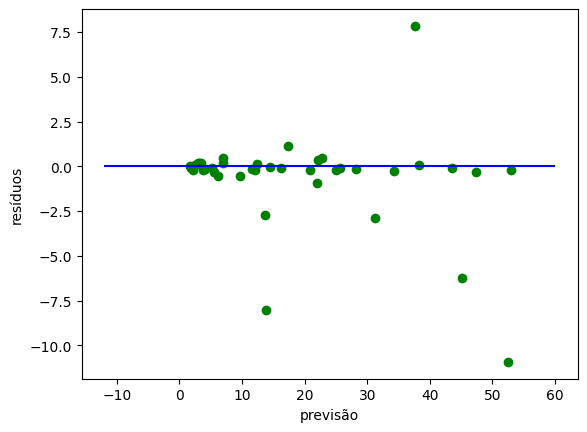

In [22]:
plt.scatter(
    y = residuos,
    x = pred,
    color = 'green'
    );

plt.hlines(
    y = 0,
    xmin = -12,
    xmax = 60,
    color = 'blue'
    );

plt.ylabel('resíduos');
plt.xlabel('previsão');

In [23]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd

In [24]:
ivar =  pd.DataFrame(vX)
ivarc = smt.add_constant(data = ivar, prepend = True)

In [25]:
print(ivarc.head())

   const      0      1      2      3      4      5      6      7      8  ...  \
0    1.0  106.7  102.8   99.2   95.7   92.5   89.4   86.6   83.8   81.2  ...   
1    1.0  161.9  159.6  157.5  155.5  153.7  152.0  150.3  148.7  147.1  ...   
2    1.0   98.5   92.5   86.7   81.3   76.1   71.3   66.8   62.9   59.2  ...   
3    1.0   58.9   57.3   55.9   54.7   53.7   52.8   51.9   51.0   50.2  ...   
4    1.0   16.5   16.0   15.6   15.2   14.9   14.5   14.2   13.8   13.4  ...   

     51    52    53    54    55    56    57    58    59    60  
0  15.9  15.4  14.9  14.4  13.9  13.5  13.1  12.6  12.2  11.8  
1  42.9  40.9  38.8  36.9  35.0  33.2  31.5  29.8  28.3  26.8  
2   8.9   8.5   8.2   8.0   7.8   7.7   7.6   7.6   7.6   7.5  
3  14.8  14.9  15.1  15.4  16.5  21.1  21.1  21.1  21.1  21.1  
4   3.7   3.6   3.5   3.5   3.5   3.5   3.5   3.5   3.5   3.5  

[5 rows x 62 columns]


In [26]:
st, p, f, fp = sms.het_breuschpagan(residuos, ivarc)

In [27]:
p

0.9873465808463834

## Passo 4:


```
# Resíduos com variância constante
```



In [28]:
px.box(residuos)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
z_residuos = scaler.fit_transform(residuos.reshape(-1,1)).flatten()

outliers_ind = np.where(np.abs(z_residuos) > 5)[0]
outliers_ind

array([], dtype=int64)

In [30]:
z_residuos

array([ 0.1728,  0.1936,  0.4076, -0.1172,  0.1476,  0.1577, -3.7852,
        0.1943,  0.19  ,  0.2814,  0.3554, -2.0671,  0.2976,  0.0272,
        0.3034,  0.1682,  0.2014,  0.644 ,  0.152 ,  0.3024,  0.1612,
        0.1131, -0.765 ,  0.1849,  0.2612, -2.7111,  0.1416,  0.2287,
        0.2498,  0.1647,  0.2467,  0.3074,  0.1966,  3.1162, -0.8367,
        0.122 ,  0.4011,  0.1628,  0.0277])

## Passo 5:

```
# Análise de multicolinearidade
```



In [31]:
ind_var = dfcalc.iloc[: , : dfcalc.shape[1] - 1]

correlacao = ind_var.corr(method = 'spearman')
correlacao.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2016,0.778927,0.788631,0.797072,0.809856,0.816042,0.820680,0.827665,0.831356,0.833345,0.837561,...,0.991195,0.994644,0.997091,0.998331,0.999320,1.000000,0.998893,0.998025,0.996806,0.995869
2017,0.774770,0.784213,0.792675,0.805508,0.811373,0.816117,0.822759,0.826285,0.828268,0.832361,...,0.989941,0.992641,0.994741,0.996324,0.997838,0.998893,1.000000,0.999522,0.998580,0.997720
2018,0.770560,0.779659,0.787738,0.800312,0.805962,0.810493,0.817002,0.820538,0.822379,0.826490,...,0.987629,0.990397,0.992905,0.994783,0.996618,0.998025,0.999522,1.000000,0.999492,0.998878
2019,0.766474,0.775539,0.783345,0.795876,0.801270,0.805638,0.811971,0.815584,0.817424,0.821360,...,0.984847,0.987706,0.990563,0.992821,0.994962,0.996806,0.998580,0.999492,1.000000,0.999642
2020,0.763831,0.772892,0.780575,0.793018,0.798381,0.802861,0.809251,0.813011,0.814884,0.818822,...,0.982791,0.985827,0.988911,0.991342,0.993696,0.995869,0.997720,0.998878,0.999642,1.000000


Fator de inflação de variância:

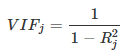

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = smt.add_constant(ind_var)
vif

,const,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Algeria,1.0,145.6,145.7,145.9,146.3,146.8,147.3,147.6,147.7,147.4,...,23.3,22.8,22.4,22.0,21.7,21.4,21.0,20.6,20.1,19.6
Antigua and Barbuda,1.0,62.9,58.8,54.3,49.6,44.9,40.4,36.1,32.3,29.0,...,7.9,7.5,7.1,6.8,6.5,6.2,6.0,5.7,5.5,5.3
Australia,1.0,20.3,19.9,19.5,19.1,18.7,18.5,18.3,18.2,18.1,...,3.8,3.6,3.5,3.3,3.3,3.2,3.2,3.2,3.2,3.2
Austria,1.0,37.3,34.9,32.9,31.1,29.6,28.3,27.2,26.3,25.7,...,3.5,3.3,3.2,3.1,3.0,3.0,2.9,2.9,2.9,3.0
Bahrain,1.0,133.0,122.6,113.2,104.4,96.0,88.1,80.9,74.1,67.8,...,7.0,6.7,6.6,6.5,6.4,6.3,6.2,6.1,6.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1.0,56.6,55.4,54.1,52.8,51.9,51.4,51.0,50.6,50.0,...,9.0,8.7,8.4,8.0,7.7,7.3,6.8,6.3,5.8,5.4
Vanuatu,1.0,104.5,101.9,99.0,96.1,93.1,90.2,87.1,84.1,81.1,...,24.0,23.9,23.7,23.3,22.9,22.4,21.9,21.4,20.9,20.3
"Venezuela, RB",1.0,58.9,57.3,55.9,54.7,53.7,52.8,51.9,51.0,50.2,...,14.8,14.9,15.1,15.4,16.5,21.1,21.1,21.1,21.1,21.1
Zambia,1.0,121.5,119.4,117.6,116.1,114.7,113.7,113.0,112.6,111.9,...,50.2,49.3,48.1,47.2,47.2,45.6,44.2,43.6,42.4,41.1


In [34]:
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index = vif.columns)

const    9.022499e+00
1960     1.209637e+05
1961     1.374236e+06
1962     2.336519e+06
1963     7.596380e+05
             ...     
2016     2.145757e+04
2017     1.115258e+05
2018     1.446752e+05
2019     2.088588e+04
2020     2.742957e+04
Length: 62, dtype: float64

In [35]:
vif.shape[0]

117

## Previsões

```
# predict / fitted values
```



In [36]:
model_rlm.predict(np.random.uniform(1,160,61).reshape(1, -1))

array([61.2607])